<a href="https://colab.research.google.com/github/kknd4eva/rl_n_armed_bandit/blob/main/rl_experiment_n_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib


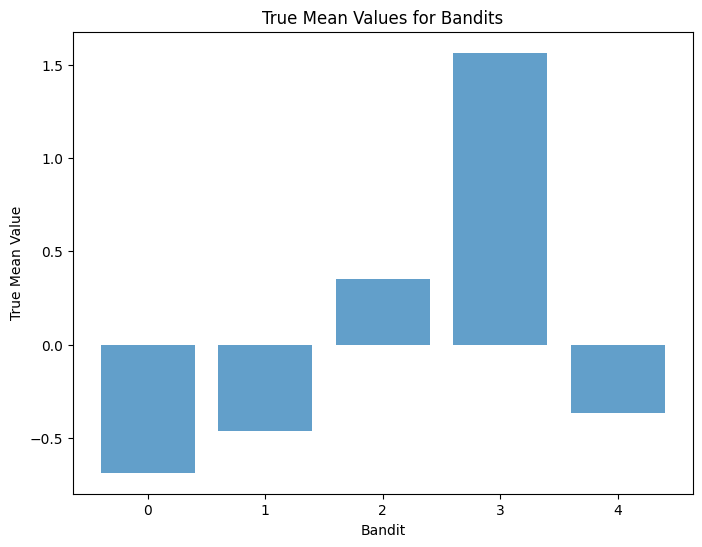

In [6]:
# Set up our environment, time steps, our rewards and our reward function.

import numpy as np
import matplotlib.pyplot as plt

num_bandits = 5
t = 2000

q_true = np.random.normal(0, 1, num_bandits)

def get_reward(mean):
    return np.random.normal(mean, 1)

plt.figure(figsize=(8, 6))
plt.bar(range(num_bandits), q_true, align='center', alpha=0.7)
plt.xlabel('Bandit')
plt.ylabel('True Mean Value')
plt.title('True Mean Values for Bandits')
plt.xticks(range(num_bandits))
plt.show()


In [8]:
# Use an entirely random selection process as a baseline
def random_selection():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action randomly
        picked = np.random.choice(num_bandits)
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

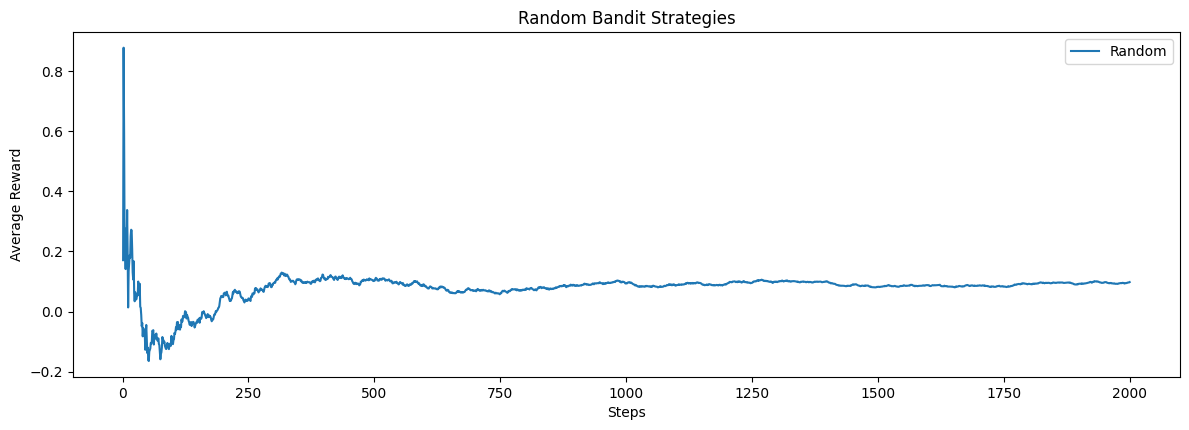

In [10]:
random_rewards = random_selection()

plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label='Random')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Random Bandit Strategies')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# define a greedy process
def greedy():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action greedily
        picked = np.argmax(q_t)
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

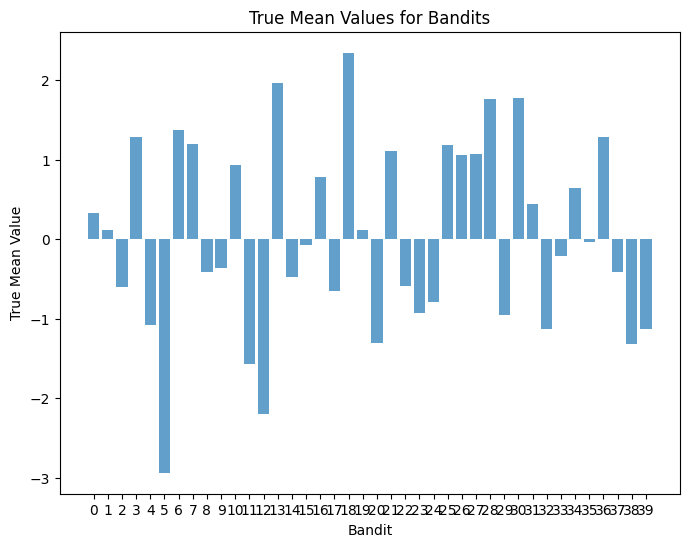

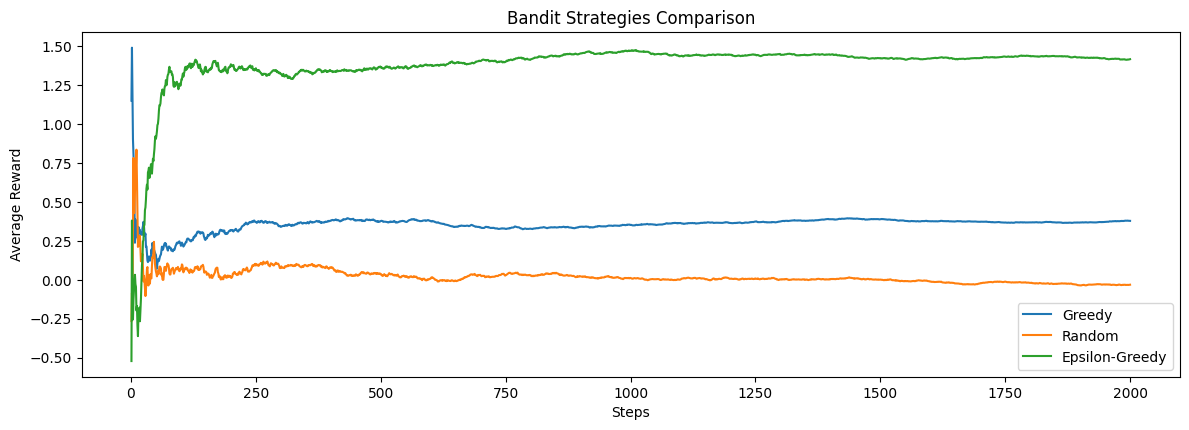

In [27]:
num_bandits = 40
t = 2000
epsilon = 0.4 # Lower value is less exploration, higher value is more exploration

q_true = np.random.normal(0, 1, num_bandits)

# Use an entirely random selection process as a baseline
def random_selection():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action randomly
        picked = np.random.choice(num_bandits)
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

# define a greedy process
def greedy():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action greedily
        picked = np.argmax(q_t)
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

# define an epsilon-greedy process
def epsilon_greedy():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # Choose a random action with probability epsilon
        if np.random.rand() < epsilon:
            picked = np.random.choice(num_bandits)
        else:
            picked = np.argmax(q_t)

        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

plt.figure(figsize=(8, 6))
plt.bar(range(num_bandits), q_true, align='center', alpha=0.7)
plt.xlabel('Bandit')
plt.ylabel('True Mean Value')
plt.title('True Mean Values for Bandits')
plt.xticks(range(num_bandits))
plt.show()

greedy_rewards = greedy()
random_rewards = random_selection()
greedy_epsilon = epsilon_greedy()

plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(greedy_rewards.keys()), list(greedy_rewards.values()), label='Greedy')
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label='Random')
plt.plot(list(greedy_epsilon.keys()), list(greedy_epsilon.values()), label='Epsilon-Greedy')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Bandit Strategies Comparison')
plt.legend()

plt.tight_layout()
plt.show()
